In [89]:
import numpy as np
import networkx as nx
from scipy.spatial.distance import pdist,squareform
import matplotlib.pyplot as plt
import matplotlib as mtl

In [4]:
norm = mtl.colors.Normalize(vmin=-1.,vmax=1.)

In [30]:
class ctln_net():
    
    def __init__(self,g,b=1.,delta=.1,epsilon=.08,tau=100.):
        
        self.g = g
        self.delta = delta
        self.epsilon = epsilon
        
        self.b = b
        self.N = g.shape[0]
        self.tau = tau
        
        assert(epsilon>0)
        assert(epsilon<(delta/(1.+delta)))

        n,m = np.shape(g)

        w = np.zeros([n,m])
        w[g==1] = -1+epsilon
        w[g==0] = -1-delta
        w[np.eye(n)==1] = 0
        
        self.w = w
        
    def relu(self,x):
        return np.maximum(x,0)
        
    def run_net(self,init,dt,T):
    
        N = self.N
        alpha = dt/self.tau
        
        n_steps = int(T//dt)
        
        x = np.zeros([N,n_steps])
        x[:,0] = init

        for ii in range(1,n_steps):
            x[:,ii] = (1-alpha)*x[:,ii-1] + alpha*(self.relu(self.w.dot(x[:,ii-1])+self.b))

        return x


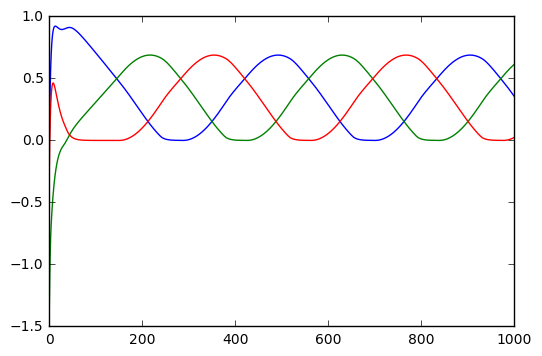

In [31]:
g = np.array([[0,0,1],[1,0,0],[0,1,0]])
ctln = ctln_net(g)
x = ctln.run_net(np.random.randn(3),10,10000)

plt.plot(x.T)
plt.show()

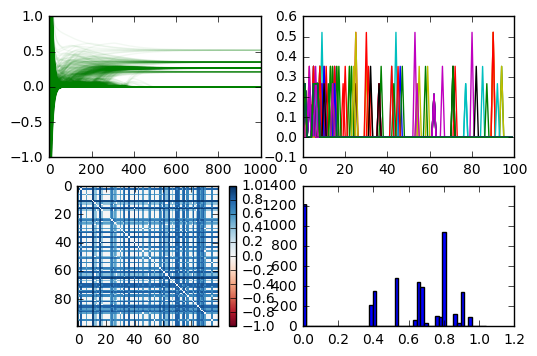

mean degree = 9.5


In [95]:
'''scale free graph'''

N = 100

ba = nx.barabasi_albert_graph(N, 5)

g = nx.to_numpy_matrix(ba)
ctln_random = ctln_net(g)

colors = ['r','g','b','c','k','y','m']*100

dt = 10.
T = 10000

reps = 100
ends = []

plt.figure()
plt.subplot(2,2,1)
for ii in range(reps):
    init = np.random.randn(N)
    x = ctln_random.run_net(init,dt,T)
    
    plt.plot(x.T,c='g',alpha=.05)
    
    ends.append(x[:,-1])
    
plt.ylim([-1,1])

plt.subplot(2,2,2)
plt.plot(np.asarray(ends).T)

# c = np.corrcoef(ends)
c = squareform(pdist(ends))

plt.subplot(2,2,3)
plt.imshow(c,interpolation='none',cmap='RdBu',norm=norm)
plt.colorbar()

plt.subplot(2,2,4)
plt.hist(c[np.tril(np.ones([reps,reps]),-1)==1],50)


plt.show()

print 'mean degree = ' + str(np.mean(np.sum(g,axis=1)))

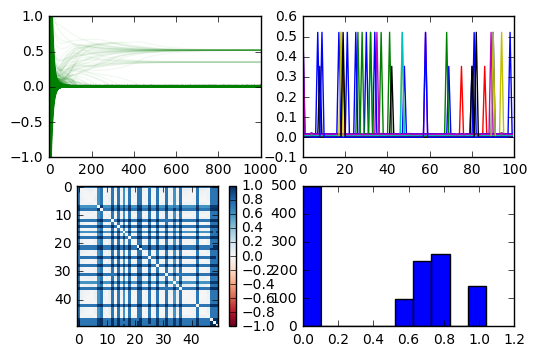

mean degree = 4.82


In [96]:
'''erdos-renyi'''

N = 100

er = nx.erdos_renyi_graph(N,.05)

g = nx.to_numpy_matrix(er)
ctln_random = ctln_net(g)

colors = ['r','g','b','c','k','y','m']*100

dt = 10.
T = 10000

reps = 50
ends = []

plt.figure()
plt.subplot(2,2,1)
for ii in range(reps):
    init = np.random.randn(N)
    x = ctln_random.run_net(init,dt,T)
    
    plt.plot(x.T,c='g',alpha=.05)
    
    ends.append(x[:,-1])
    
plt.ylim([-1,1])

plt.subplot(2,2,2)
plt.plot(np.asarray(ends).T)

# c = np.corrcoef(ends)
c = squareform(pdist(ends))

plt.subplot(2,2,3)
plt.imshow(c,interpolation='none',cmap='RdBu',norm=norm)
plt.colorbar()

plt.subplot(2,2,4)
plt.hist(c[np.tril(np.ones([reps,reps]),-1)==1])


plt.show()

print 'mean degree = ' + str(np.mean(np.sum(g,axis=1)))